# Tratamento dos dados

In [1]:
#imports
from pandas import Series
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Carregando os arquivos e salvando em um dataframe
file = "dados_compras.json"
compras = pd.read_json(file, orient = "records")
compras.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [19]:
#verificar estatísticas das colunas do dataframe (para ser utilizado mais tarde para entedner se os futuros dados obitos fazem sentido)
print(compras.describe())

            Idade     Item ID       Valor
count  780.000000  780.000000  780.000000
mean    22.729487   91.292308    2.931192
std      6.930604   52.707897    1.115780
min      7.000000    0.000000    1.030000
25%     19.000000   44.000000    1.960000
50%     22.000000   91.000000    2.880000
75%     25.000000  135.000000    3.910000
max     45.000000  183.000000    4.950000


# Informações dos Consumidores
* Número total de consumidores
* Número total de vendas

In [20]:
#verificar o total de vendas e de consumidores (se há mais de uma venda por consumidor)
demografico = compras.loc[:, ["Login", "Sexo","Idade"]]
demografico.head()

,Login,Sexo,Idade
0,Aelalis34,Masculino,38
1,Eolo46,Masculino,21
2,Assastnya25,Masculino,34
3,Pheusrical25,Masculino,21
4,Aela59,Masculino,23


In [21]:
players = demografico.drop_duplicates()
players

,Login,Sexo,Idade
0,Aelalis34,Masculino,38
1,Eolo46,Masculino,21
2,Assastnya25,Masculino,34
3,Pheusrical25,Masculino,21
4,Aela59,Masculino,23
...,...,...,...
771,Lassista97,Masculino,24
772,Sidap51,Masculino,15
773,Chamadarsda63,Masculino,21
778,Quelaton80,Masculino,20


# Análise Geral de Compras
* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total

In [36]:
def analise():
    media_vendas = compras['Valor'].mean()
    numero_compras = compras['Valor'].sum()
    numero_vendas = compras['Valor'].count()
    
    print(f"preço médio das vendas: ${media_vendas:.2f}")
    print(f"numero compras: ${numero_compras:,.2f}")
    print(f"numero total de vendas: {numero_vendas:}")
    #O ponto é para indicar que temos um separador decimal;
    #O N é o número de casas decimais que vamos ter;
    #E o f é para indicar que temos um float, ou seja, um número com casas decimais.
analise()

preço médio das vendas: $2.93
numero compras: $2,286.33
numero total de vendas: 780


In [42]:
#itens únicos
item_unicos = len(compras["Item ID"].unique())#retorna valores únicos da serie
print(f"iten únicos: {item_unicos}")

iten únicos: 183


# Informações Demográficas Por Gênero

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

In [43]:
demografico.head()

,Login,Sexo,Idade
0,Aelalis34,Masculino,38
1,Eolo46,Masculino,21
2,Assastnya25,Masculino,34
3,Pheusrical25,Masculino,21
4,Aela59,Masculino,23


In [48]:
def contagem():##lembrete: testar com pd.DataFrame
    masc = len(compras.loc[compras['Sexo'] == 'Masculino'])
    fem = len(compras.loc[compras["Sexo"] == 'Feminino'])
    others = len(compras.loc[compras['Sexo'] == 'Outro / Não Divulgado'])
    print("Sexo Masculino: {0} ({1:.2f}%)".format(masc, (masc / (masc + fem + others))*100))#poderia ser usado o map
    print("Sexo Feminino: {0} ({1:.2f}%)".format(fem, (fem / (masc + fem + others))*100))
    print("Outros / Não divulgaram: {0} ({1:.2f}%)".format(others, (others/ (masc + fem + others))*100))

In [49]:
contagem()

Sexo Masculino: 633 (81.15%)
Sexo Feminino: 136 (17.44%)
Outros / Não divulgaram: 11 (1.41%)


<AxesSubplot:>

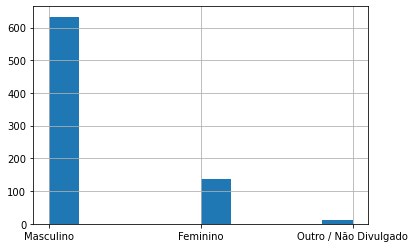

In [50]:
#histograma para visualizar a quantidade de dados
##lembrete:pesquisar algum gráfico no seaborn
compras.Sexo.hist()

# Análise de Compras Por Gênero 

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária

In [62]:
#puxar uma séria filtrando apenas o gênero e calcular o preço médio das compras
def genero():##lembrete: 
    gen_masc = compras.loc[compras['Sexo'] == 'Masculino']
    gen_fem = compras.loc[compras['Sexo'] == 'Feminino']
    def analises():
        masc_media = pd.DataFrame(data = gen_masc, columns = ['Valor']).median().map("${:.2f}".format)#
        masc_sum = pd.DataFrame(data = gen_masc, columns = ['Valor']).sum()
        masc_compras = pd.DataFrame(data = gen_masc, columns= ['Valor']).count()
        fem_media = pd.DataFrame(data = gen_fem, columns = ['Valor']).median()
        fem_sum = pd.DataFrame(data = gen_fem, columns = ['Valor']).sum()
        fem_compras = pd.DataFrame(data = gen_fem, columns= ['Valor']).count()
        result = pd.DataFrame(data = {'Masculino':[masc_media, masc_sum, masc_compras],
                                      'Feminino': [fem_media,fem_sum, fem_compras]} , 
                                       index= ['Média', 'Soma', 'Total de Compras'])
        display(result)##lebrete: descobrir como retirar o texto dtype, tentar map ou .format
        #data munging
    analises()

In [63]:
genero()

,Masculino,Feminino
Média,Valor $2.91 dtype: object,Valor 2.615 dtype: float64
Soma,Valor 1867.68 dtype: float64,Valor 382.91 dtype: float64
Total de Compras,Valor 633 dtype: int64,Valor 136 dtype: int64


# Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

In [90]:
total_compras = compras.groupby(["Login"]).sum()["Valor"]
media_compras = compras.groupby(["Login"]).median()["Valor"] 
qntd_compras = compras.groupby(["Login"]).count()["Valor"]
media = total_compras / compras["Login"]

tabela = pd.DataFrame({"Total compras": total_compras,
                           "Numero compras": qntd_compras,
                           "media_compras": media_compras,
                           "Média compras": media})
tabela.head(4)

,Total compras,Numero compras,media_compras,Média compras
Adairialis76,2.46,1.0,2.46,NaN
Aduephos78,6.70,3.0,2.46,NaN
Aeduera68,5.80,3.0,2.29,NaN
Aela49,2.46,1.0,2.46,NaN


#  Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos

In [ ]:
# Cálculos básicos
user_total = purchase_file.groupby(["Login"]).sum()["Valor"].rename("Valor Total de Compra")
user_average = purchase_file.groupby(["Login"]).mean()["Valor"].rename("Valor Médio de Compra")
user_count = purchase_file.groupby(["Login"]).count()["Valor"].rename("Número de Compras")

# Dataframe para os resultados
user_data = pd.DataFrame({"Valor Total de Compra": user_total, "Valor Médio de Compra": user_average, "Número de Compras": user_count})

# Data Munging
user_data ["Valor Total de Compra"] = user_data["Valor Total de Compra"].map("${:,.2f}".format)
user_data ["Valor Médio de Compra"] = user_data["Valor Médio de Compra"].map("${:,.2f}".format)
user_data.sort_values("Valor Total de Compra", ascending=False).head(5)

# Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra